In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
# import sklearn

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, mean_squared_error

# import tensorflow as tf
# from tensorflow import keras

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

seed=99

In [2]:
four_factor_10 = pd.read_csv('four_factor_10.csv', index_col=0)
four_factor_10

,game_id,season,date,away_team,away_score,home_team,home_score,result,a_eFGp,a_FTr,a_ORBp,a_TOVp,h_eFGp,h_FTr,h_ORBp,h_TOVp
0,131410290001,1314,2013-10-29,ORL,87,IND,97,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,131410290002,1314,2013-10-29,CHI,95,MIA,107,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,131410290003,1314,2013-10-29,LAC,103,LAL,116,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,131410300004,1314,2013-10-30,BRK,94,CLE,98,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,131410300005,1314,2013-10-30,BOS,87,TOR,93,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11974,222304091226,2223,2023-04-09,UTA,117,LAL,128,1,0.526835,0.203724,0.2417,0.127276,0.571512,0.262791,0.2569,0.118315
11975,222304091227,2223,2023-04-09,NOP,108,MIN,113,1,0.572581,0.215438,0.2313,0.121103,0.560502,0.207763,0.2320,0.119090
11976,222304091228,2223,2023-04-09,MEM,100,OKC,115,1,0.593341,0.179039,0.2285,0.112724,0.506515,0.235613,0.2587,0.092797
11977,222304091229,2223,2023-04-09,LAC,119,PHO,114,0,0.596108,0.208726,0.2185,0.126932,0.534066,0.202198,0.2686,0.098874


In [3]:
four_factor_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11979 entries, 0 to 11978
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   game_id     11979 non-null  int64  
 1   season      11979 non-null  int64  
 2   date        11979 non-null  object 
 3   away_team   11979 non-null  object 
 4   away_score  11979 non-null  int64  
 5   home_team   11979 non-null  object 
 6   home_score  11979 non-null  int64  
 7   result      11979 non-null  int64  
 8   a_eFGp      11966 non-null  float64
 9   a_FTr       11966 non-null  float64
 10  a_ORBp      11966 non-null  float64
 11  a_TOVp      11966 non-null  float64
 12  h_eFGp      11961 non-null  float64
 13  h_FTr       11961 non-null  float64
 14  h_ORBp      11961 non-null  float64
 15  h_TOVp      11961 non-null  float64
dtypes: float64(8), int64(5), object(3)
memory usage: 1.6+ MB


In [4]:
four_factor_10.describe()

,game_id,season,away_score,home_score,result,a_eFGp,a_FTr,a_ORBp,a_TOVp,h_eFGp,h_FTr,h_ORBp,h_TOVp
count,1.197900e+04,11979.000000,11979.000000,11979.000000,11979.000000,11966.000000,11966.000000,11966.000000,11966.000000,11961.000000,11961.000000,11961.000000,11961.000000
mean,1.763236e+11,1763.175557,106.328325,108.643042,0.572502,0.519998,0.203046,0.233570,0.123494,0.519387,0.203006,0.233158,0.123541
std,2.920031e+10,292.003775,13.135676,13.018141,0.494736,0.031223,0.031784,0.033936,0.014691,0.031091,0.031842,0.033643,0.014436
min,1.314010e+11,1314.000000,66.000000,64.000000,0.000000,0.415638,0.064516,0.108000,0.070244,0.388889,0.086022,0.116500,0.066163
25%,1.516032e+11,1516.000000,97.000000,100.000000,0.000000,0.498224,0.180513,0.210200,0.113184,0.498214,0.180751,0.209900,0.113581
50%,1.718121e+11,1718.000000,106.000000,108.000000,1.000000,0.520177,0.200895,0.232900,0.122899,0.519298,0.200935,0.232800,0.123143
75%,2.021032e+11,2021.000000,115.000000,117.000000,1.000000,0.540838,0.222869,0.255800,0.133110,0.539752,0.223267,0.254600,0.132919
max,2.223123e+11,2223.000000,176.000000,175.000000,1.000000,0.642857,0.358025,0.422000,0.224873,0.627059,0.368889,0.361000,0.218341


In [5]:
four_factor_10.dropna(inplace=True)
four_factor_10.reset_index(drop=True, inplace=True)

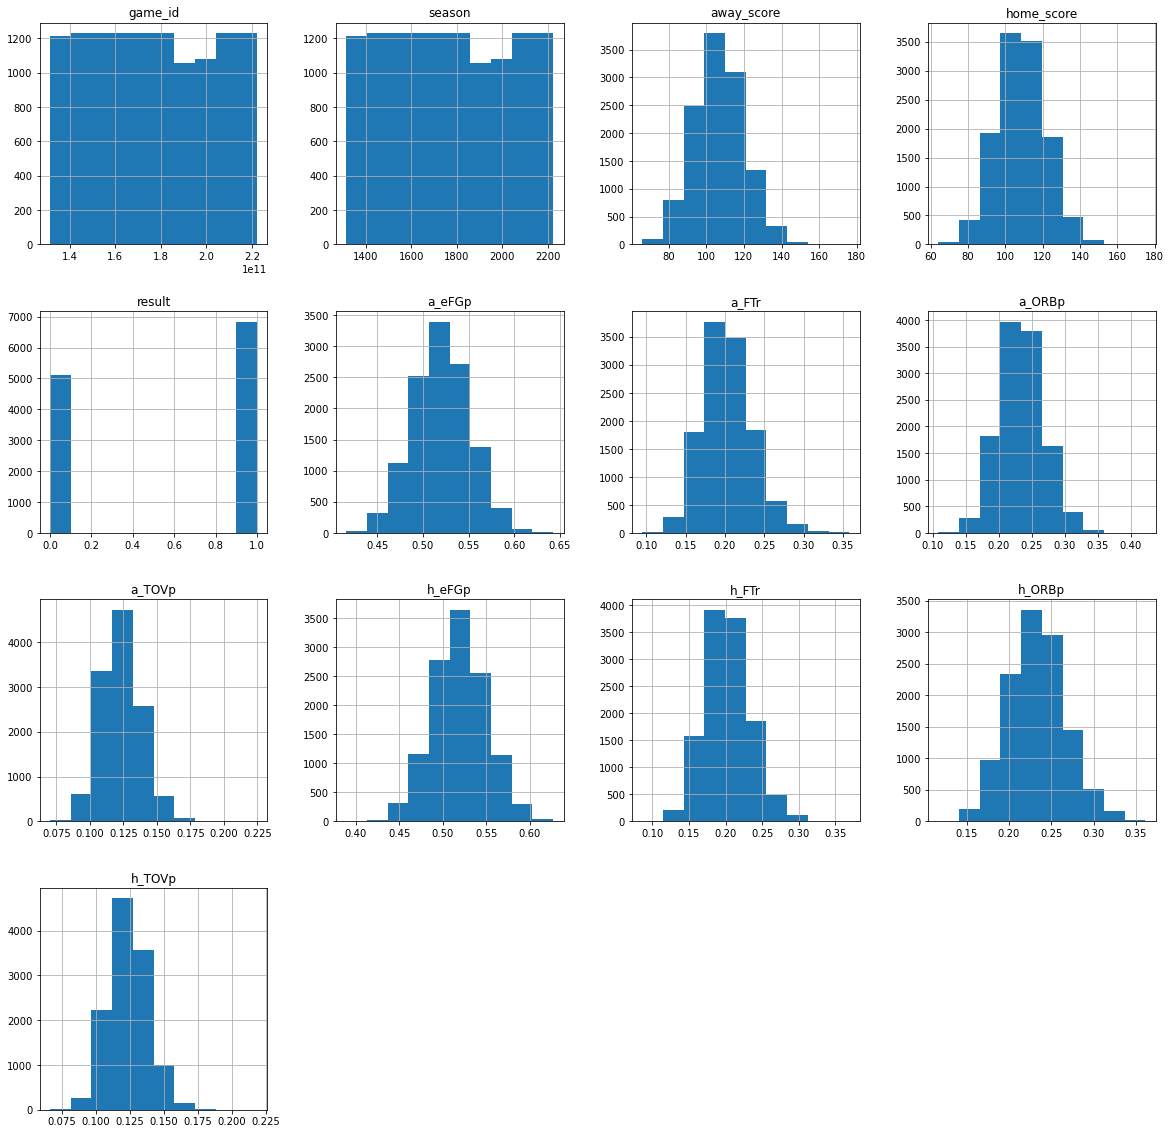

In [6]:
four_factor_10.hist(figsize=(20,20));

In [7]:
four_factor_10['result'].value_counts(normalize=True)

1    0.572026
0    0.427974
Name: result, dtype: float64

In [8]:
four_factor_sum = four_factor_10

In [9]:
four_factor_10['eFGp'] = four_factor_10['a_eFGp'] - four_factor_10['h_eFGp']
four_factor_10['FTr'] = four_factor_10['a_FTr'] - four_factor_10['h_FTr']
four_factor_10['ORBp'] = four_factor_10['a_ORBp'] - four_factor_10['h_ORBp']
four_factor_10['TOVp'] = four_factor_10['a_TOVp'] - four_factor_10['h_TOVp']

### baseline model is to just pick home team (57.2% accuracy).

In [27]:
stat_columns = ['a_eFGp', 'a_FTr', 'a_ORBp', 'a_TOVp', 'h_eFGp', 'h_FTr', 'h_ORBp', 'h_TOVp']
X = four_factor_10[stat_columns]
y = four_factor_10['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=seed)

In [28]:
logreg = LogisticRegression()

cv_scores = cross_val_score(logreg, X_train, y_train, cv=3)
cv_scores.mean()

0.5983277591973244

In [29]:
model = logreg.fit(X_train, y_train)
train_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)
model.score(X_test, y_test)

0.5917753259779338

In [12]:
log_model=sm.Logit(y_train,X_train).fit()
print(log_model.summary())

Optimization terminated successfully.
         Current function value: 0.651715
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 result   No. Observations:                 8970
Model:                          Logit   Df Residuals:                     8962
Method:                           MLE   Df Model:                            7
Date:                Mon, 12 Jun 2023   Pseudo R-squ.:                 0.04414
Time:                        08:46:23   Log-Likelihood:                -5845.9
converged:                       True   LL-Null:                       -6115.9
Covariance Type:            nonrobust   LLR p-value:                2.047e-112
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
a_eFGp       -13.2026      0.667    -19.788      0.000     -14.510     -11.895
a_FTr         -0.7606      0.

### try with combined stats

In [38]:
stat_columns = ['eFGp', 'FTr', 'ORBp', 'TOVp']
X = four_factor_10[stat_columns]
y = four_factor_10['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=seed)

In [39]:
logreg = LogisticRegression()

cv_scores = cross_val_score(logreg, X_train, y_train, cv=3)
cv_scores.mean()

0.6098104793756968

In [40]:
model = logreg.fit(X_train, y_train)
train_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)
model.score(X_test, y_test)

0.6054831160147108

In [59]:
logreg = LogisticRegression(solver='saga', random_state=seed)

In [60]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.1, 1.0, 10.0, 100.0],
}

In [61]:
grid_search = GridSearchCV(logreg, param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(solver='saga'),
             param_grid={'C': [0.1, 1.0, 10.0, 100.0],
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [62]:
grid_search.best_estimator_, grid_search.best_score_

(LogisticRegression(C=10.0, penalty=None, solver='saga'), 0.6177257525083613)

In [23]:
# coefs = np.abs(model.coef_[0])
# coefs[0] / sum(coefs)

0.5782913998836452

<Axes: ylabel='Feature'>

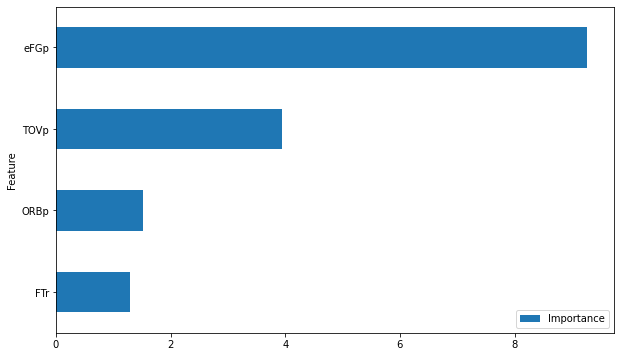

In [24]:
# coefficients = model.coef_
# avg_importance = np.mean(np.abs(coefficients), axis=0)

# feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
# feature_importance = feature_importance.sort_values('Importance', ascending=True)
# feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [25]:
X_train = sm.add_constant(X_train)
log_model=sm.Logit(y_train,X_train).fit()
print(log_model.summary())

Optimization terminated successfully.
         Current function value: 0.652259
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 result   No. Observations:                 8970
Model:                          Logit   Df Residuals:                     8965
Method:                           MLE   Df Model:                            4
Date:                Mon, 12 Jun 2023   Pseudo R-squ.:                 0.04335
Time:                        09:36:48   Log-Likelihood:                -5850.8
converged:                       True   LL-Null:                       -6115.9
Covariance Type:            nonrobust   LLR p-value:                1.974e-113
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3356      0.022     15.174      0.000       0.292       0.379
eFGp         -13.1142      0.

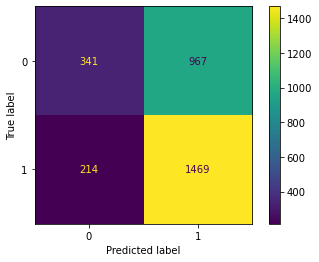

In [26]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=test_pred)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot();

### lots of false positives (model errs toward always choosing home team)

### KNN

In [67]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

grid_search = GridSearchCV(knn, param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [7, 9, 11, 13, 15], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']})

In [68]:
grid_search.best_estimator_, grid_search.best_score_

(KNeighborsClassifier(n_neighbors=13, p=1), 0.5813823857302118)

In [72]:
knn_model = grid_search.best_estimator_.fit(X_train, y_train)
train_pred = knn_model.predict(X_train)
test_pred = knn_model.predict(X_test)
knn_model.score(X_test, y_test)

0.5947843530591775

In [73]:
rfc = RandomForestClassifier(random_state=seed)

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(rfc, param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=99),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [74]:
grid_search.best_estimator_, grid_search.best_score_

(RandomForestClassifier(max_depth=5, max_features='auto', min_samples_leaf=4,
                        n_estimators=200, random_state=99),
 0.6178372352285396)

In [75]:
rfc_model = grid_search.best_estimator_.fit(X_train, y_train)
train_pred = rfc_model.predict(X_train)
test_pred = rfc_model.predict(X_test)
rfc_model.score(X_test, y_test)

0.6158475426278837

### Naive Bayes

In [78]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)
train_pred = gnb_model.predict(X_train)
test_pred = gnb_model.predict(X_test)
gnb_model.score(X_test, y_test)

0.6121698428619191

### SVC

In [79]:
svc = SVC(random_state=seed)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svc, param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(random_state=99),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [80]:
grid_search.best_estimator_, grid_search.best_score_

(SVC(C=1, random_state=99), 0.6189520624303233)

In [81]:
svc_model = grid_search.best_estimator_.fit(X_train, y_train)
train_pred = svc_model.predict(X_train)
test_pred = svc_model.predict(X_test)
svc_model.score(X_test, y_test)

0.6074891340688733